In [1]:
google_colab_flag = True # Make it False if do not intend to use Google Colab and want to train in local machine!!

# For training in Google Colab
if(google_colab_flag):
  from google.colab import drive
  drive.mount('/content/drive')
  !ls
  import sys
  root_path = '/content/drive/MyDrive/Research/' # This is the path to where in google drive the code is stored!
  sys.path.append(root_path)

# For local training
else:
  root_path = ''

Mounted at /content/drive
drive  sample_data


In [2]:
import zipfile
with zipfile.ZipFile(root_path + "Dataset.zip","r") as zip_ref:
  zip_ref.extractall(root_path + "")

In [3]:
from sklearn.preprocessing import label_binarize
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from PIL import Image
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, ReLU, add
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Reshape, Concatenate, Lambda
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from glob import glob
import warnings
import os
import shutil
from PIL import ImageFile
warnings.simplefilter('error', Image.DecompressionBombWarning)
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [4]:
#root_path = 'C:/Users/USER/Downloads/anhi/'
datasetFolderName = root_path + 'Dataset'
sourceFiles = []
classLabels = ['light', 'moderate', 'no', 'severe']
X = []
Y = []

img_rows, img_cols = 224, 224 # input image dimensions
train_path = datasetFolderName+'/train/'
validation_path = datasetFolderName+'/valid/'
test_path = datasetFolderName+'/test/'

In [5]:
def transferBetweenFolders(source, dest, splitRate): 
    global sourceFiles
    sourceFiles = os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers = int(len(sourceFiles)*splitRate)
        transferIndex = random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(datasetFolderName+'/'+source+'/'+label+'/', 
                               datasetFolderName+'/'+dest+'/'+label+'/', 
                               splitRate)

def my_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1Score = f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, recall, f1Score

In [6]:
def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(datasetFolderName+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        for i in range(len(classLabels)):
            if(folderName==classLabels[i]):
                Y.append(i)

In [7]:
# Organize file names and class labels in X and Y variables
for i in range(len(classLabels)):
    prepareNameWithLabels(classLabels[i])

In [8]:
X = np.asarray(X)
Y = np.asarray(Y)

In [9]:
# Note that, this model structure is a very basic one
epoch = 30
batch_size = 32

# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [10]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

def getModel():
    mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

    # don't train existing weights
    for layer in mobilenet.layers:
      layer.trainable = False
    # our layers - you can add more if you want
    x = Flatten()(mobilenet.output)
    """
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.2)(x)
    """
    prediction = Dense(len(classLabels), activation='softmax')(x)
    # create a model object
    model = Model(inputs=mobilenet.input, outputs=prediction)
    # tell the model what cost and optimization method to use
    model.compile(
      loss='categorical_crossentropy',
      optimizer='sgd',
      metrics=['accuracy']
    )
    return model


# **Stratified K-Fold Cross validation**

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 1
Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
17235968/17225924 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
50/50 [==============================] - 37s 448ms/step - loss: 36.8456 - accuracy: 0.4419 - val_loss: 49.6320 - val_accuracy: 0.4475
Epoch 2/30
50/50 [==============================] - 23s 457ms/step - loss: 16.5906 - accuracy: 0.6144 - val_loss: 25.1918 - val_accuracy: 0.5200
Epoch 3/30
50/50 [==============================] - 22s 433ms/step - loss: 9.3235 - accuracy: 0.6938 - val_loss: 21.3745 - val_accuracy: 0.4450
Epoch 4/30
50/50 [==============================] - 23s 459ms/step - loss: 7.3967 - accuracy: 0.7450 - val_loss: 11.4177 - val_accuracy: 0.5975
Epoch 5/30
50/50 [==============================] - 23s 466ms/step - loss: 6.1286 - accuracy: 0.7881 - val_loss: 12.2035 - val_accuracy: 0.5525
Epoch 6/30
50/50 [==============================] - 22s 436ms/step - loss: 4.2527 - accuracy: 0.8037 - val_loss: 29.3576 - val_accuracy: 0.5500
Epoch 7/30
50/50 [==============================] - 22s 440ms/step - loss: 2.9155 - accuracy: 0.8475 - val_loss: 7.9903 - val_accuracy

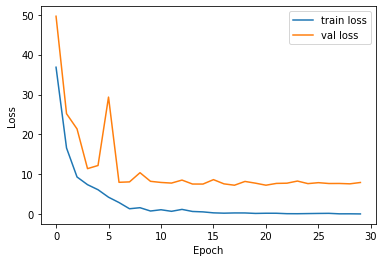

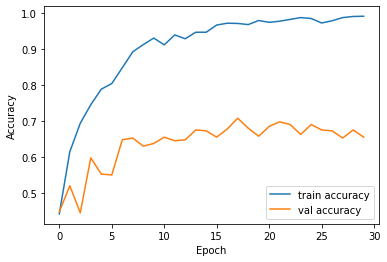

==============TEST RESULTS============
Found 180 images belonging to 4 classes.
6/6 [==============================] - 1s 189ms/step
Accuracy  : 0.8611111111111112
Precision : 0.8853021978021978
recall : 0.8611111111111112
f1Score : 0.8640290426138415
[[37  7  0  1]
 [ 0 40  0  5]
 [ 0  7 35  3]
 [ 0  2  0 43]]
6/6 [==============================] - 1s 117ms/step


<Figure size 432x288 with 0 Axes>

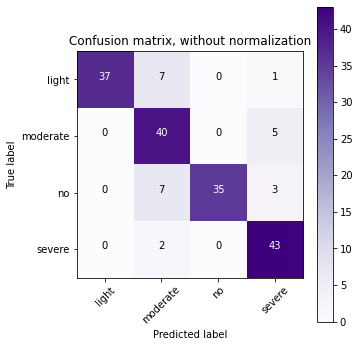

<Figure size 432x288 with 0 Axes>

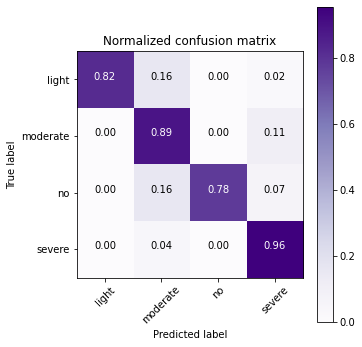

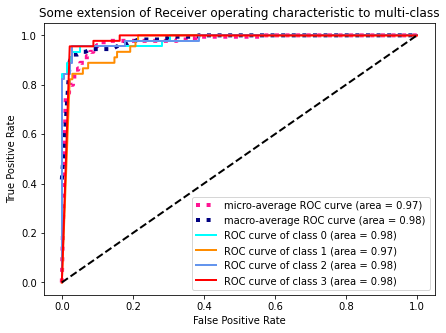

Results for fold 2
Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
50/50 [==============================] - 23s 443ms/step - loss: 37.9283 - accuracy: 0.4181 - val_loss: 24.4291 - val_accuracy: 0.5625
Epoch 2/30
50/50 [==============================] - 22s 438ms/step - loss: 13.4268 - accuracy: 0.6169 - val_loss: 11.5174 - val_accuracy: 0.5850
Epoch 3/30
50/50 [==============================] - 23s 455ms/step - loss: 14.9499 - accuracy: 0.6475 - val_loss: 22.9392 - val_accuracy: 0.5950
Epoch 4/30
50/50 [==============================] - 22s 434ms/step - loss: 7.2105 - accuracy: 0.7487 - val_loss: 11.8914 - val_accuracy: 0.6225
Epoch 5/30
50/50 [==============================] - 22s 432ms/step - loss: 4.0505 - accuracy: 0.7987 - val_loss: 8.7603 - val_accuracy: 0.6650
Epoch 6/30
50/50 [==============================] - 22s 433ms/step - loss: 4.5804 - accuracy: 0.8231 - val_loss: 8.0022 - val_accuracy: 0.6350
Epoch 7/30
50/50 [==============================] - 22s 434ms/step - loss: 4.0133 - accuracy: 0.8263 - val_loss: 15.5329 - val_accuracy

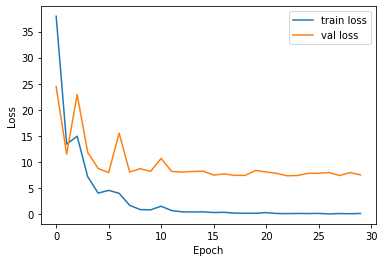

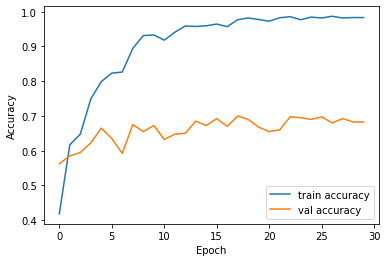

==============TEST RESULTS============
Found 180 images belonging to 4 classes.
6/6 [==============================] - 1s 118ms/step
Accuracy  : 0.9444444444444444
Precision : 0.9452638082957231
recall : 0.9444444444444444
f1Score : 0.9446819193399555
[[43  2  0  0]
 [ 1 40  0  4]
 [ 0  1 44  0]
 [ 0  2  0 43]]
6/6 [==============================] - 1s 117ms/step


<Figure size 432x288 with 0 Axes>

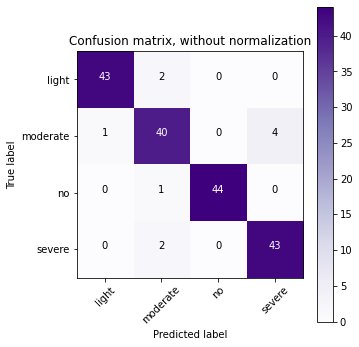

<Figure size 432x288 with 0 Axes>

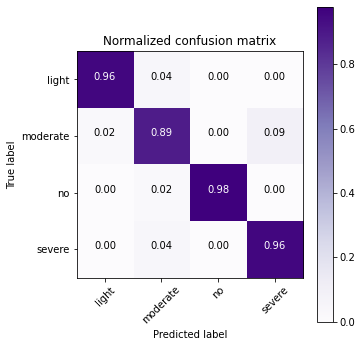

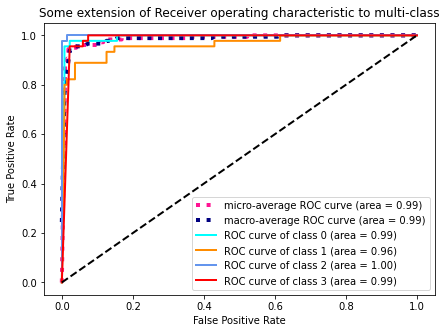

Results for fold 3
Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
50/50 [==============================] - 25s 472ms/step - loss: 33.7175 - accuracy: 0.4419 - val_loss: 21.5027 - val_accuracy: 0.4600
Epoch 2/30
50/50 [==============================] - 22s 434ms/step - loss: 17.2390 - accuracy: 0.5856 - val_loss: 27.5207 - val_accuracy: 0.5900
Epoch 3/30
50/50 [==============================] - 22s 436ms/step - loss: 9.6947 - accuracy: 0.6856 - val_loss: 20.2285 - val_accuracy: 0.4725
Epoch 4/30
50/50 [==============================] - 23s 457ms/step - loss: 7.8865 - accuracy: 0.7237 - val_loss: 20.6460 - val_accuracy: 0.6300
Epoch 5/30
50/50 [==============================] - 22s 432ms/step - loss: 5.7985 - accuracy: 0.7656 - val_loss: 12.0117 - val_accuracy: 0.5750
Epoch 6/30
50/50 [==============================] - 22s 430ms/step - loss: 3.4229 - accuracy: 0.8269 - val_loss: 9.0029 - val_accuracy: 0.6275
Epoch 7/30
50/50 [==============================] - 22s 435ms/step - loss: 1.8154 - accuracy: 0.8863 - val_loss: 8.4710 - val_accuracy:

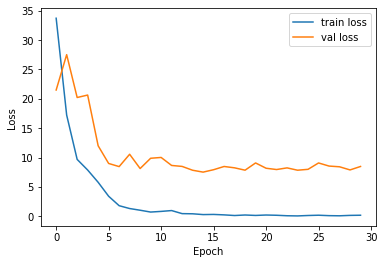

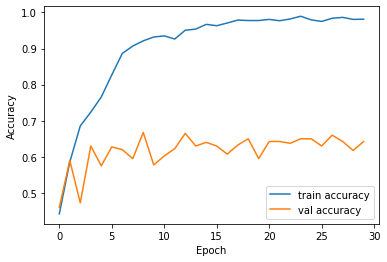

==============TEST RESULTS============
Found 180 images belonging to 4 classes.
6/6 [==============================] - 1s 122ms/step
Accuracy  : 0.9333333333333333
Precision : 0.9355113636363636
recall : 0.9333333333333333
f1Score : 0.9331087563695285
[[39  4  1  1]
 [ 1 42  1  1]
 [ 0  2 42  1]
 [ 0  0  0 45]]
6/6 [==============================] - 1s 118ms/step


<Figure size 432x288 with 0 Axes>

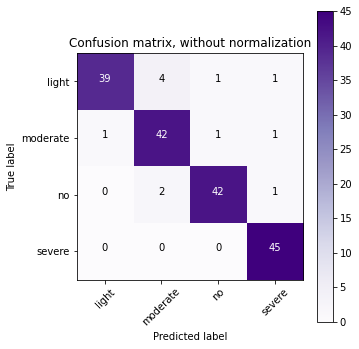

<Figure size 432x288 with 0 Axes>

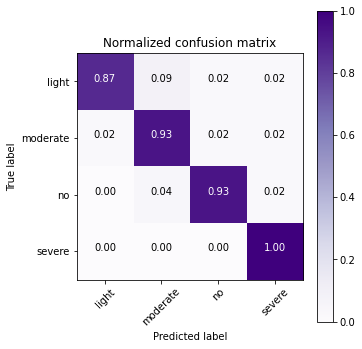

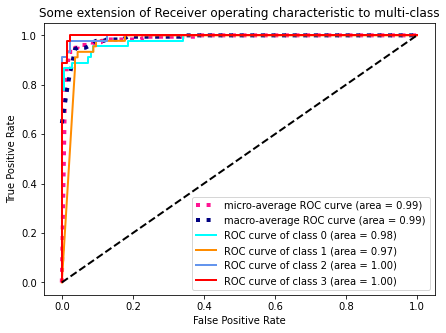

Results for fold 4
Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
50/50 [==============================] - 26s 485ms/step - loss: 32.6206 - accuracy: 0.4450 - val_loss: 26.2102 - val_accuracy: 0.5225
Epoch 2/30
50/50 [==============================] - 22s 437ms/step - loss: 19.0464 - accuracy: 0.5756 - val_loss: 18.9937 - val_accuracy: 0.5775
Epoch 3/30
50/50 [==============================] - 23s 464ms/step - loss: 11.1198 - accuracy: 0.6594 - val_loss: 16.5390 - val_accuracy: 0.5575
Epoch 4/30
50/50 [==============================] - 22s 440ms/step - loss: 8.9739 - accuracy: 0.7275 - val_loss: 10.9210 - val_accuracy: 0.6350
Epoch 5/30
50/50 [==============================] - 22s 435ms/step - loss: 5.5196 - accuracy: 0.7750 - val_loss: 20.5618 - val_accuracy: 0.5150
Epoch 6/30
50/50 [==============================] - 22s 437ms/step - loss: 2.4450 - accuracy: 0.8600 - val_loss: 10.9856 - val_accuracy: 0.6525
Epoch 7/30
50/50 [==============================] - 23s 451ms/step - loss: 2.0215 - accuracy: 0.8763 - val_loss: 13.4073 - val_accura

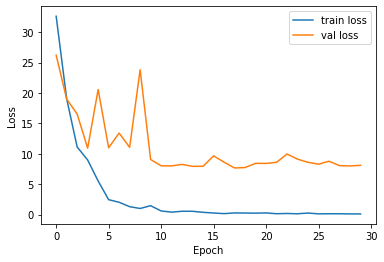

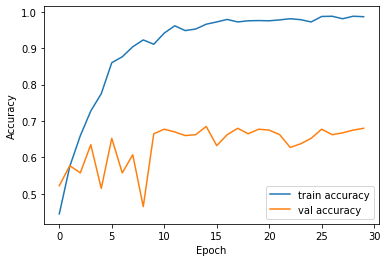

==============TEST RESULTS============
Found 180 images belonging to 4 classes.
6/6 [==============================] - 1s 129ms/step
Accuracy  : 0.9277777777777778
Precision : 0.9297328336557059
recall : 0.9277777777777778
f1Score : 0.9278527649743407
[[40  4  0  1]
 [ 3 41  0  1]
 [ 1  2 41  1]
 [ 0  0  0 45]]
6/6 [==============================] - 1s 120ms/step


<Figure size 432x288 with 0 Axes>

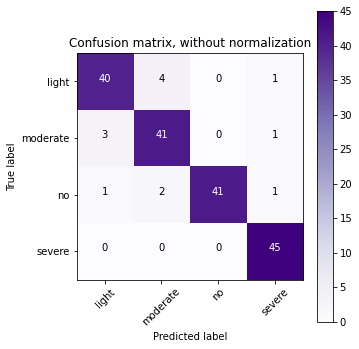

<Figure size 432x288 with 0 Axes>

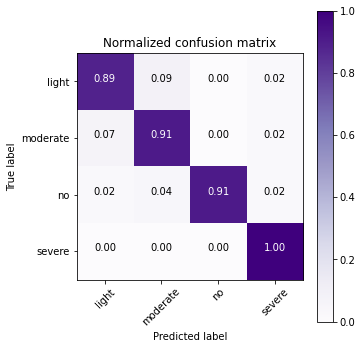

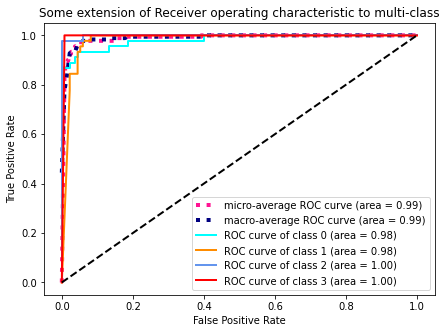

Results for fold 5
Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
50/50 [==============================] - 25s 473ms/step - loss: 36.2803 - accuracy: 0.4306 - val_loss: 10.6918 - val_accuracy: 0.5900
Epoch 2/30
50/50 [==============================] - 22s 448ms/step - loss: 14.7591 - accuracy: 0.6094 - val_loss: 9.8733 - val_accuracy: 0.6200
Epoch 3/30
50/50 [==============================] - 23s 457ms/step - loss: 9.8012 - accuracy: 0.6844 - val_loss: 9.9446 - val_accuracy: 0.6100
Epoch 4/30
50/50 [==============================] - 22s 439ms/step - loss: 5.8423 - accuracy: 0.7581 - val_loss: 11.2340 - val_accuracy: 0.6450
Epoch 5/30
50/50 [==============================] - 23s 458ms/step - loss: 6.4866 - accuracy: 0.7544 - val_loss: 9.4842 - val_accuracy: 0.6300
Epoch 6/30
50/50 [==============================] - 22s 434ms/step - loss: 3.3066 - accuracy: 0.8394 - val_loss: 11.3968 - val_accuracy: 0.6425
Epoch 7/30
50/50 [==============================] - 22s 439ms/step - loss: 3.1710 - accuracy: 0.8537 - val_loss: 14.8462 - val_accuracy: 

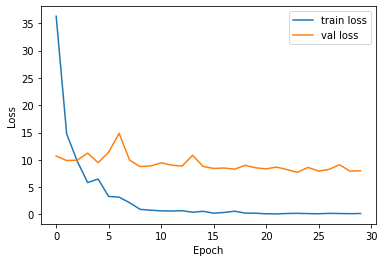

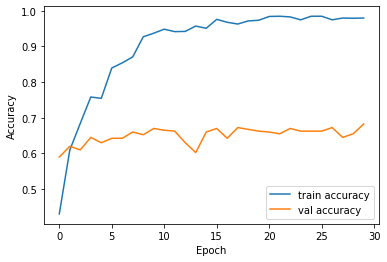

==============TEST RESULTS============
Found 180 images belonging to 4 classes.
6/6 [==============================] - 1s 126ms/step
Accuracy  : 0.8777777777777778
Precision : 0.8831303017158282
recall : 0.8777777777777778
f1Score : 0.8771714266674163
[[37  7  0  1]
 [ 3 39  1  2]
 [ 2  2 37  4]
 [ 0  0  0 45]]
6/6 [==============================] - 1s 119ms/step


<Figure size 432x288 with 0 Axes>

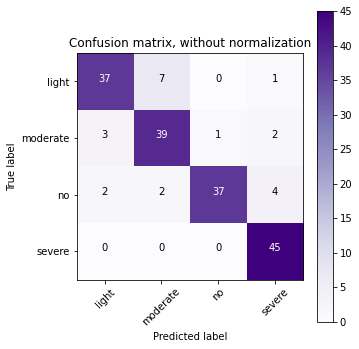

<Figure size 432x288 with 0 Axes>

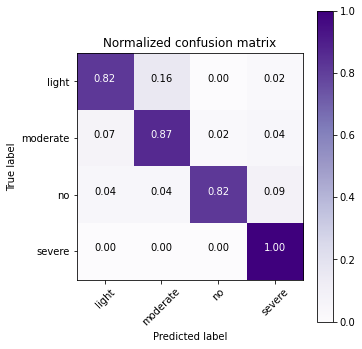

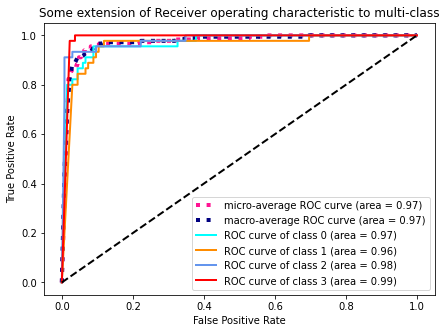

In [11]:
# ===============Stratified K-Fold======================
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(X, Y)
foldNum = 0

for train_index, val_index in skf.split(X, Y):
    # First cut all images from validation to train (if any exists)
    transferAllClassBetweenFolders('valid', 'train', 1.0)
    foldNum += 1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    # Move validation images of this fold from train folder to the validation folder
    for eachIndex in range(len(X_val)):
        classLabel = ''
        for i in range(len(classLabels)):
          if(Y_val[eachIndex]==i):
              classLabel=classLabels[i]
        # Then, copy the validation images to the validation folder
        shutil.move(datasetFolderName+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    datasetFolderName+'/valid/'+classLabel+'/'+X_val[eachIndex])
        
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
        
    # Start ImageClassification Model
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

    validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')   
    
    model=getModel()   
    # fit model
    history=model.fit_generator(train_generator, 
                                validation_data=validation_generator,
                                epochs=epoch)
    
    result = pd.DataFrame(history.history)
    result.to_csv(root_path + 'training_history_fold_{}.csv'.format(foldNum))

    # loss
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    fig.savefig(root_path + 'loss_fold_{}'.format(foldNum), dpi=3000)

    # accuracy
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    fig.savefig(root_path + 'accuracy_fold_{}'.format(foldNum), dpi=3000)


    print("==============TEST RESULTS============")
    test_generator = test_datagen.flow_from_directory(
            test_path,
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode=None,
            shuffle=False) 
    predictions = model.predict(test_generator, verbose=1)
    yPredictions = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    testAcc, testPrec, testRecall, testFScore = my_metrics(true_classes, yPredictions)
    model.save(root_path + "model_fold_{}.h5".format(foldNum))

    Y_pred = model.predict(test_generator, verbose=1)
 
    #Confusion matrix
    import itertools
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Purples):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

        plt.figure(figsize=(5, 5))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    cm = confusion_matrix(y_true = test_generator.classes, y_pred = np.argmax(Y_pred, axis = -1))
    class_names = ['light', 'moderate', 'no', 'severe']
      
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()
    fig.savefig(root_path + 'confusion_matrix_0_fold_{}'.format(foldNum), dpi=3000) 

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    plt.show()
    fig.savefig(root_path + 'confusion_matrix_1_fold_{}'.format(foldNum), dpi=3000)

    
    #Thao add for ROC curve
    y_true1 = label_binarize(true_classes,classes=[0,1,2,3])    

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    thresholds = dict()
    n_classes = y_true1.shape[1]
    for k in range(n_classes):
        fpr[k], tpr[k], thresholds[k] = roc_curve(y_true1[:,k], predictions[:,k], drop_intermediate=False)
        roc_auc[k] = auc(fpr[k], tpr[k])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true1.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
   
    all_fpr = np.unique(np.concatenate([fpr[k] for k in range(n_classes)]))
    
    mean_tpr = np.zeros_like(all_fpr)
    for k in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[k], tpr[k])
    
    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw = 2
    fig, axes = plt.subplots(1, 1, figsize=(7, 5))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
    for k, color in zip(range(n_classes), colors):
        plt.plot(fpr[k], tpr[k], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(k, roc_auc[k]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    fig.savefig(root_path + 'Some extension of Receiver operating characteristic to multi-class_fold_{}'.format(foldNum), dpi=3000)

https://stackoverflow.com/questions/70278059/plotting-the-roc-curve-for-a-multiclass-problem